# EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_homicidios = pd.read_csv('C:\\Users\\fedez\\OneDrive\\Escritorio\\PI_02.zip\\PI-Data Analytics\\Data\\homicidios.csv')

In [3]:
df_homicidios.head()

,ID Siniestro,Número de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Momento del día,Lugar del hecho,...,Comuna,XY (CABA),Coordenada X,Coordenada Y,Participantes,Víctima,Acusado,Rol víctima,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,Madrugada,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,Madrugada,AV GRAL PAZ Y AV DE LOS CORRALES,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,Mañana,AV ENTRE RIOS 2034,...,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,Madrugada,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,...,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,Madrugada,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,...,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29


## Siniestros por edad y sexo.

### Distribución de edad por año.  
En el siguiente gráfico se puede observar que las edades de las víctimas de accidentes de tránsito puede ser muy variada y que a lo largo del tiempo se mantiene una constante de personas que tienen edades cercanas a los 40 años como edad media.

Text(0, 0.5, 'Edad')

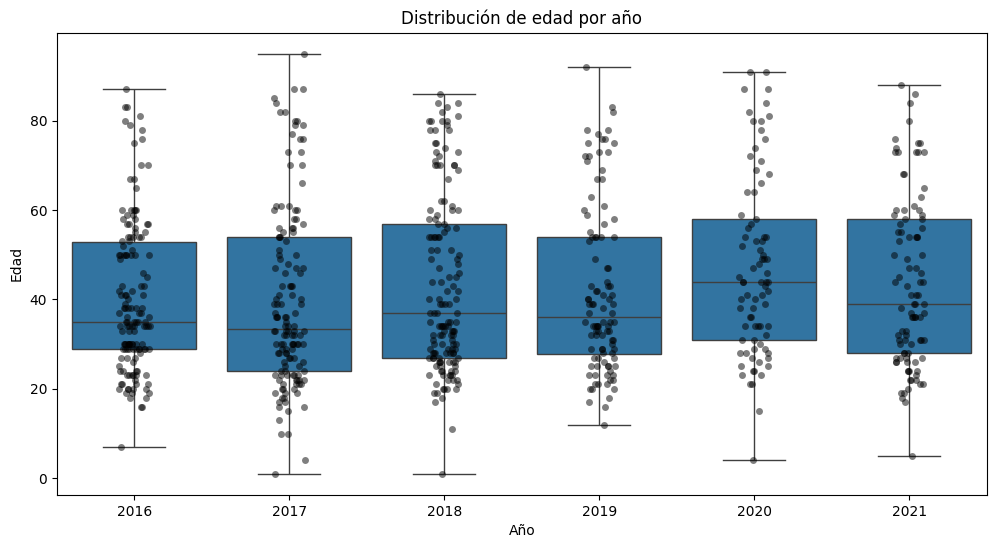

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_homicidios, x="Año", y="Edad")
sns.stripplot(data=df_homicidios, x="Año", y="Edad", color='black', alpha=0.5)  

plt.title("Distribución de edad por año")
plt.xlabel("Año")
plt.ylabel("Edad")

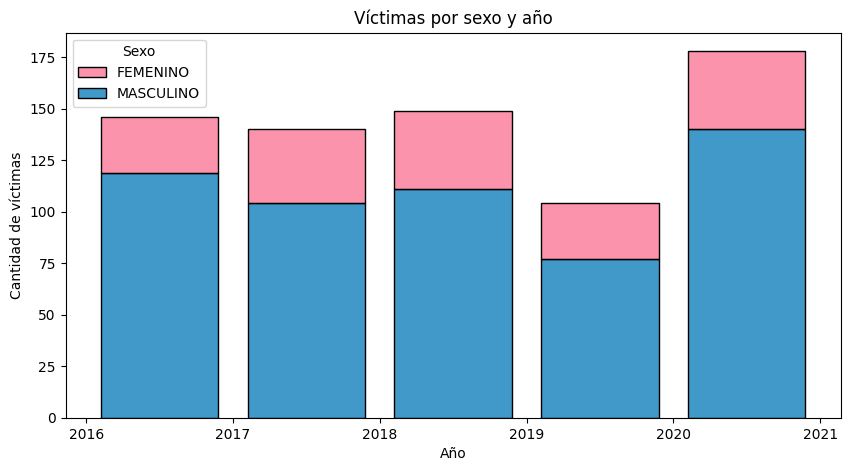

In [5]:
conteo = df_homicidios.groupby(['Sexo', 'Año']).size().reset_index(name='conteo')

plt.figure(figsize=(10, 5))
sns.histplot(data=conteo, x='Año', weights='conteo', hue='Sexo', palette={'MASCULINO': '#0077b6', 'FEMENINO': '#fb6f92'}, multiple='stack', bins=5, shrink=0.8)

plt.title('Víctimas por sexo y año')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')
plt.show()

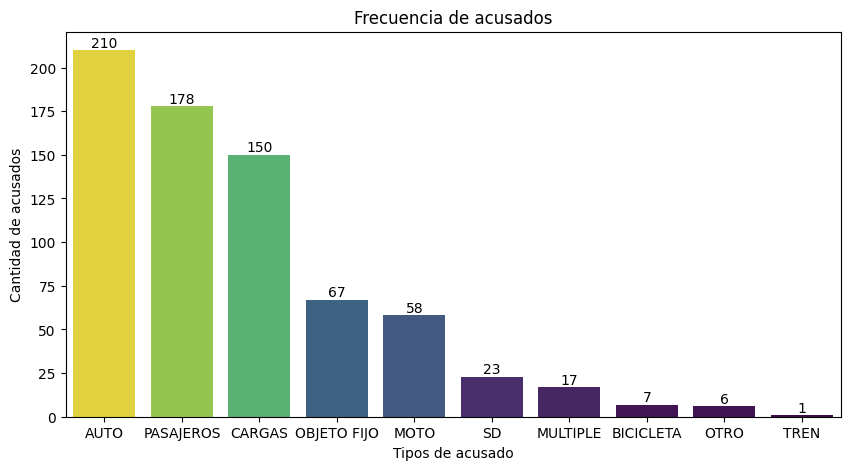

In [6]:
conteo_acusados = df_homicidios['Acusado'].value_counts().reset_index()
conteo_acusados.columns = ['Acusado', 'conteo']

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Acusado', y='conteo', data=conteo_acusados, palette='viridis', hue='conteo', legend=False)

for index, row in conteo_acusados.iterrows():
    barplot.text(index, row['conteo'], row['conteo'], color='black', ha="center", va="bottom")

plt.title('Frecuencia de acusados')
plt.xlabel('Tipos de acusado')
plt.ylabel('Cantidad de acusados')
plt.show()

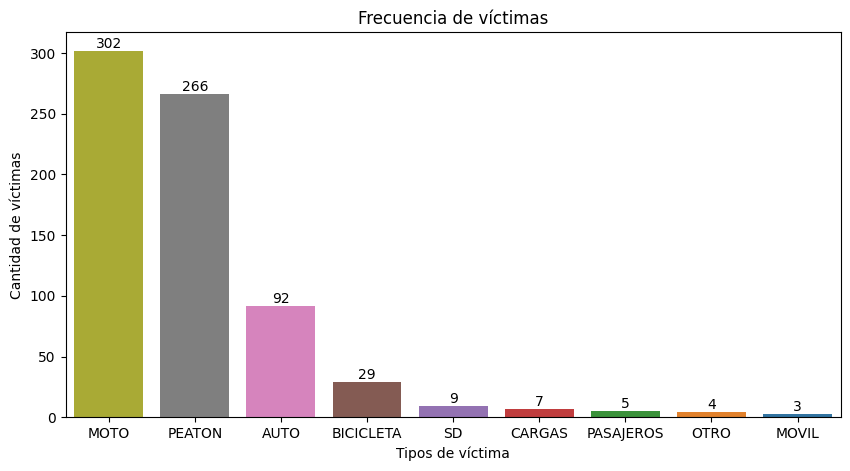

In [7]:
conteo_victimas = df_homicidios['Víctima'].value_counts().reset_index()
conteo_victimas.columns = ['Víctima', 'conteo']

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Víctima', y='conteo', data=conteo_victimas, palette='tab10', hue='conteo', legend=False)

for index, row in conteo_victimas.iterrows():
    barplot.text(index, row['conteo'], row['conteo'], color='black', ha="center", va="bottom")

plt.title('Frecuencia de víctimas')
plt.xlabel('Tipos de víctima')
plt.ylabel('Cantidad de víctimas')
plt.show()

## Siniestros en el marco espacial.

## Siniestros en el marco temporal.

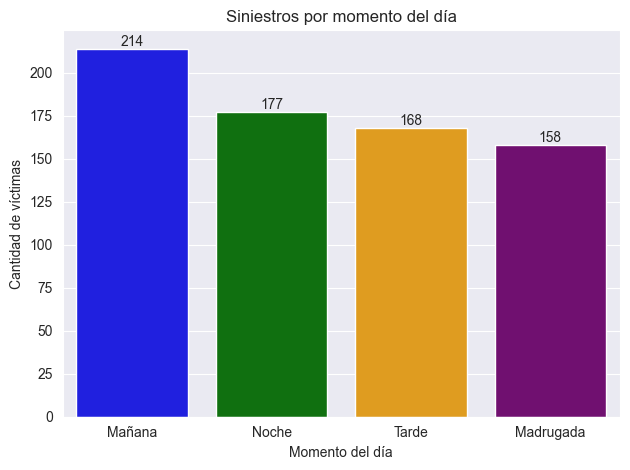

In [9]:
period_counts = df_homicidios['Momento del día'].value_counts()

sns.set_style('darkgrid')
ax = sns.barplot(x=period_counts.index, y=period_counts.values, hue=period_counts.index, palette=['blue', 'green', 'orange', 'purple'], legend=False)

for patch in ax.patches:
    y_pos = patch.get_height() + 0.1
    label = f"{int(patch.get_height())}"
    plt.text(patch.get_x() + patch.get_width() / 2, y_pos, label, ha='center', va='bottom', fontsize=10)

plt.xlabel('Momento del día')
plt.ylabel('Cantidad de víctimas')
plt.title('Siniestros por momento del día')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Siniestros por mes.

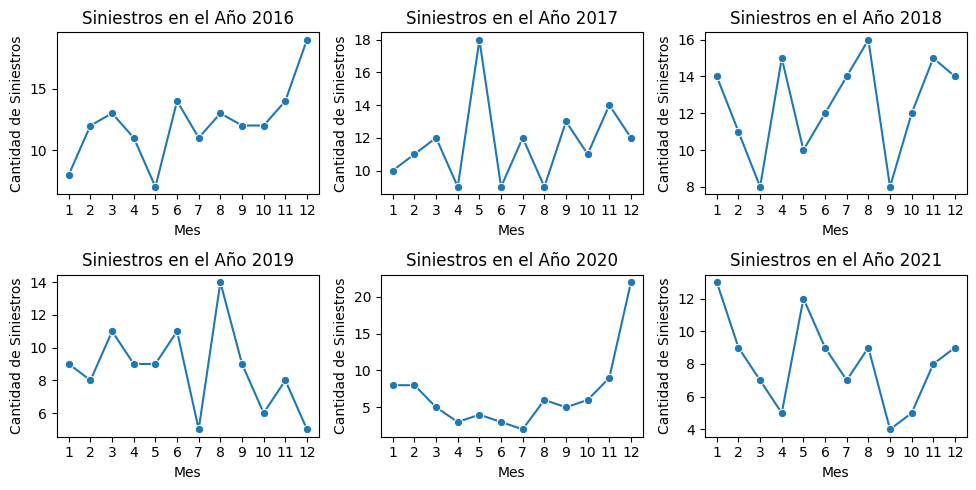

In [ ]:
df_homicidios['Mes'] = df_homicidios['Mes'].astype(int)

df_agrupado = df_homicidios.groupby(['Año', 'Mes']).size().reset_index(name='Cantidad de Siniestros')

plt.figure(figsize=(10, 5))

for i, anio in enumerate(df_agrupado['Año'].unique(), start=1):
    plt.subplot(2, 3, i)  
    sns.lineplot(
        data=df_agrupado[df_agrupado['Año'] == anio], 
        x='Mes', 
        y='Cantidad de Siniestros', 
        marker='o'
    )
    plt.title(f"Siniestros en el Año {anio}")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de Siniestros")
    plt.xticks(range(1, 13))

plt.tight_layout()

plt.show()